# Assignment 1

In [2]:
import pandas as pd
import re

In [3]:
from google.colab import drive
drive.mount('/content/drive')

!wget -P /content/drive/MyDrive/NTU_Studies/2021_Fall

Mounted at /content/drive
wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


## Read data

`ig5000.csv`ÊòØ‰∏Ä‰ªΩÂåÖÂê´5000ÁØáigÁúüÂØ¶Ë≤ºÊñáÁöÑË≥áÊñôÈõÜÔºålabel=0ÊåáÊó•Â∏∏ÊñáÔºålabel=1ÊåáÂª£Âëä„ÄÇ

In [4]:
ig5000 = '/content/drive/MyDrive/NTU_Studies/2021_Fall/assignment-1-tanlianhui/ig5000.csv'

ig = pd.read_csv(ig5000).dropna()
ig

text  label
0     VÈ†òË®≠Ë®àËÉΩÂ§†‰øÆÈ£æËáâÂûãüòç\nÊ∏õÈΩ°Ê≥°Ê≥°Ë¢ñÊ¥ãË£ùüòâ\nüëâhttps://lihi1.com/JDym...      1
1     „Äê20210303„Äë\nËÉΩÂãáÊï¢ËøΩÂ§¢ÁöÑ‰∫∫\nË∫´‰∏äÈÉΩÈñÉËëóÂíåÁÖ¶ÁöÑÂÖâËäí\n‰πüÊòØÂ•ΩÁîüÁæ®ÊÖïÔºÅ\n-\nÊï¨...      0
2                                Áéâ ËÄ≥Áí∞\n#ËÄ≥Áí∞ #Áéâ #earrings      1
3     „ÄêÁæéÂúãÁòãÊΩÆWWE Taiwan„Äë\n‰∏çÁÆ°ÊòØWWE EliteÈÇÑÊòØAEW UnrivaledÁ≥ª...      1
4     üåà\nÂ∞ãÊôöÁöÑpost ‰∏ÄpoÂ∑≤Á∂ìË¢´ÁßíÊÆ∫Â•ΩÂ§ö‰ª∂ÁöÑVintage sports windbrea...      1
...                                                 ...    ...
4995     üåàÈï∑Ê°ø34cmÁ∂†Áë™ÁëôÁÖôÂò¥ÁÖôÊñó\nÂæ©Âè§Èï∑Ê°øÁÖôÊñó\Â°ûÂÖ•Ëè∏ËçâÂç≥ÂèØ‰ΩøÁî®\n162028\001390      1
4996  ÊäóÊïè‰πãÈÅ∏*Eunice ËóçÁîòËèäËàíÁ∑©ÊΩîÈù¢‰π≥~1000ml \n\n‚òÖÂ•ΩÂ§öÁæéÂÆπÈô¢ÈÉΩÁî®‰Ω¢‚òÖ\n\n...      1
4997             ‰ªäÂ§©ÁâπÂú∞ÊØîËºÉÊÖ¢Âá∫ÈñÄ\n‰ΩÜÈÇÑÊòØÂ§™Êó©Âà∞Â≠∏Ê†°‰∫Üü§¶üèº‚Äç‚ôÄÔ∏è\nÂèØËÉΩ‰∏ãÈõ®Èóú‰øÇËªäÂ•ΩÂ§ö‰ªäÂ§©      1
4998  Â§ßÈáèÈüìÂúãÊñ∞Ë≤®‰∏äÊû∂üå∏\nÊ≠°ËøéÂà∞ÈñÄÂ∏ÇÈÅ∏Ë≥º\n-\nüü•üî∫üî∂üüßüî∏üü°üü®üü©üü¢üîπüî∑üü¶üü£üü™\n‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî...      1
4999                                     „ÑüÀä ùüπ/ùüøÈåØÈÅé‰∫Ü‰∏âÂÖ´Â©¶Â•≥ÁØÄ      0

[4901 rows x 2 columns]

## Clean and tokenize text

In [5]:
! pip3 install -U ckip-transformers
from ckip_transformers.nlp import CkipWordSegmenter

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2.9 MB 8.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.3 MB 37.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 895 kB 37.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 636 kB 36.5 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 52 kB 1.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [6]:
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^\u4E00-\u9FD5]"

def clean(texts, clean_re):
    output = []
    for text in texts:
        text = re.sub(clean_re, '', text)
        output.append(text)
    return output

In [7]:
def tokenize(texts, driver, batch_size, max_length):
    output=[]
    ws  = driver(texts, use_delim=False, 
                batch_size = batch_size,
                 max_length = max_length
                    )
    output = [" ".join(ls) for ls in ws]
    return output

In [8]:
ws_driver = CkipWordSegmenter(device = 0, level = 3)

Downloading:   0%|          | 0.00/804 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/388M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/107k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/301 [00:00<?, ?B/s]

In [9]:
ig_cleaned = clean(ig['text'].to_list(), text_cleaning_re)
ig_segmented = tokenize(ig_cleaned, ws_driver, 512, 250)

Inference: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 11/11 [02:51<00:00, 15.63s/it]


In [10]:
ig_segmented[:10]

['È†ò Ë®≠Ë®à ËÉΩÂ§† ‰øÆÈ£æ ËáâÂûã Ê∏õÈΩ° Ê≥°Ê≥°Ë¢ñ Ê¥ãË£ù È†òÂûãÈ†ò ÂéöËñÑ ËñÑ Ê¨æ',
 'ËÉΩ ÂãáÊï¢ ËøΩ Â§¢ ÁöÑ ‰∫∫ Ë∫´ ‰∏ä ÈÉΩ ÈñÉ Ëëó ÂíåÁÖ¶ ÁöÑ ÂÖâËäí ‰πü ÊòØ Â•ΩÁîü Áæ®ÊÖï Êï¨ ÈÇ£ Â§© ‰∏ÄËµ∑ Áúã ÁöÑ Â§ïÈôΩ Áúü Â∏åÊúõ Âì™ Â§© ËÉΩ ‰∏ÄËµ∑ Âéª Áúã Ê•µÂÖâ',
 'Áéâ ËÄ≥Áí∞ ËÄ≥Áí∞ Áéâ',
 'ÁæéÂúã ÁòãÊΩÆ ‰∏çÁÆ° ÊòØ ÈÇÑÊòØ Á≥ªÂàó ÁöÑ ‰∫∫ÂÅ∂ ÂÖ¨‰ªî Âú® ÈÄô ÊáâÊúâÁõ°Êúâ Ê≠£Áâà Âë®ÈÇä ÂïÜÂìÅ ‰∫∫Ê∞£ ÁÜ±Ë≥£ ‰∏≠ ÊÉ≥Ë¶Å ÊúÄÂ§ö ÊúÄ ÂÑ™ÊÉ† ÊúÄ ÈΩäÂÖ® ÁöÑ ÁæéÂúã ËÅ∑Ê•≠ ÊëîËßí Ê≠£Áâà Âë®ÈÇä ÁÜ±ÈñÄ ÂïÜÂìÅ Âø´Èªû ‰æÜ Êàë ÁöÑ Ë≥£Â†¥ ÂèÉËÄÉ ÈÅ∏Ë≥º Âêß Èú≤Â§© Ë≥£Â†¥ Ëù¶ÁöÆ Ë≥£Â†¥ ÂÖ¨‰ªî ‰∫∫ÂÅ∂ ÁæéÂúã ÁòãÊΩÆ ÁæéÂúã ‰ª£Ë≥º ËÅ∑Ê•≠ ÊëîËßí ÁæéÊ≥∞ÊΩÆ Âè∞ÂåóÂ∏Ç Ê≠°Ëøé Èù¢‰∫§ ÈáçÈáèÁ¥ö ÂÜ†Ëªç ÊëîËßí ‰∫∫ÂÅ∂ ÈñãÁÆ±Êñá ÊëîËßí ÁãÇÁÜ± ÂÜ†Ëªç ËÖ∞Â∏∂',
 'Â∞ãÊôö ÁöÑ ‰∏Ä Â∑≤Á∂ì Ë¢´ ÁßíÊÆ∫ Â•ΩÂ§ö ‰ª∂ ÁöÑ ÊØè ‰∏Ä ‰ª∂ ÊàêËâ≤ Âíå ÈÉΩ Â•Ω Èùö ËÄå‰∏î ÈÉΩ ÊòØ Â•≥Áîü ÂèØ Á©ø ÁöÑ Áî∑Â•≥ ÂèØ Á©ø ÂñúÊ≠° ÁöÑ ‰∏çË¶Å ÈåØÈÅé ‰∫Ü Êàë Âú∞ Áïô Ë≤® Âï¶ ËÇ© Èï∑Ë°£ Èï∑ ÈÅãÂãïÈ¢® Ë§∏ ÊáâË©≤ ‰øÇ Êò•Â§© ÊúÄ Â•Ω ÂòÖ ‰º¥‰æ∂ ÊΩÆÊøï ÊØõÊØõÈõ® Âèà ÂèØ‰ª• Á

## Build Word2vec model

In [11]:
from gensim.models import Word2Vec

# A list of lists of token
w2v_corpus = [text.split() for text in ig_segmented]

In [12]:
# Ë®≠ÂÆöembeddingÁ∂≠Â∫¶
sentence_len= 200

# Define model
w2v_model = Word2Vec(size = sentence_len,
                window = 5,
                min_count = 3,
                workers = 4,
                batch_words = 10000)
                #sg = 1 : use skip-gram model
                
w2v_model.build_vocab(w2v_corpus)

In [13]:
w2v_model.train(w2v_corpus, total_examples = len(w2v_corpus), epochs = 32)

(8363582, 10027776)

In [14]:
len(w2v_model.wv.vocab)

11699

In [15]:
# print word embeddings of 'Êàë'
w2v_model.wv['Êàë']

array([ 1.8734571 ,  1.006333  ,  0.2986468 ,  1.8997405 , -0.5812928 ,
        0.32127008, -0.76671946, -0.5045762 , -1.7717824 ,  0.2171433 ,
       -0.942103  ,  0.6123963 , -1.2440307 ,  0.87103885,  0.01387089,
       -0.13525525, -0.24973589,  1.0485474 ,  0.20017354,  0.3094483 ,
        0.75864804,  0.58818775,  0.63237053,  0.10158443, -0.72871226,
       -1.0048779 ,  0.5903104 , -0.03062462,  0.6422119 ,  0.17984898,
       -1.7080821 ,  1.326254  , -0.010504  , -1.4346746 , -0.38259572,
        1.8045181 , -0.43764478, -0.958389  ,  0.37672806, -0.42178   ,
        1.170814  ,  0.03820473,  0.96019053,  0.53224325,  0.26667678,
       -0.6613967 ,  0.99825394,  0.21988085,  0.89969605,  0.606159  ,
        0.7505542 ,  0.8050047 , -0.3098247 , -0.10845809, -0.09492546,
        0.705219  , -0.46828434,  0.0429253 , -1.3542439 , -0.9591669 ,
       -1.4752991 ,  0.17771429, -1.3827496 , -0.13099262, -0.23666653,
       -0.52618104, -0.41794023, -0.7340087 ,  1.1918292 ,  0.58

### View word2vec results

In [16]:
similar_words = {
    search_term:
    [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
    for search_term in
    ['‰∫∫', 'ÂúãÂÆ∂', 'Â∑ßÂÖãÂäõ', 'Ê∞¥Êô∂', 'Â§©Ê∞£']
}
similar_words

{'‰∫∫': ['Âú∞Êñπ', 'Ë¶™', '‰∫ã', 'Â∞çÊñπ', 'Áï¢Á´ü'],
 'ÂúãÂÆ∂': ['Á∏ΩÁµ±', 'ÈöéÂ±§', 'Ê∞ëÊóè', 'ÈöéÁ¥ö', 'Ë∫´‰ªΩ'],
 'Â§©Ê∞£': ['ÂÜ∑', 'Êô¥', 'ËΩâÊ∂º', 'Â≠£ÁØÄ', 'ÂÜ¨Â§©'],
 'Â∑ßÂÖãÂäõ': ['Ë±ÜÊ≤ô', 'È§Ö‰πæ', 'ËçâËéì', 'ÂéöÁâá', 'Â•∂ÈÖ•'],
 'Ê∞¥Êô∂': ['Á¨ëÂìàÂìà', 'ÊâãÈèà', 'ÊâãÈçä', 'ÊãâÂà©Áë™', 'Â§©ÁÑ∂Áü≥']}

# Exercise 1 (100%)

Âú®`ig5000.csv`‰∏≠ÔºåË´ãÊâæÂá∫ÊâÄÊúâ‰øÆÈ£æ„ÄåÊ∞¥Êô∂„ÄçÁöÑË©ûÂΩô‰∏¶‰ª•‰ªñÂÄëÁöÑword embeddings‰ΩúË©ûÂΩôÂàÜÁæ§(cluster)„ÄÇ

- Áõ°ÈáèÊéíÈô§ÊéâËàáÊ∞¥Êô∂ÊòØNN compoundÁöÑË©ûÂΩôÔºåÂ¶Ç:„Äå**È¶ôÊ∞õ**Ê∞¥Êô∂„Äç„ÄÅ„Äå**Ë≤°ÈÅã**Ê∞¥Êô∂„Äç
- Ë´ãÂãøÁõ¥Êé•Êì∑ÂèñÂá∫ÁèæÂú®„ÄåÊ∞¥Êô∂„ÄçÂâçÁöÑÊâÄÊúâtokens
- Cluster analysisË´ãÊé°Áî®hierarchical clustering


ÈÄôÈ°åÁöÑoutputËá≥Â∞ëÈúÄË¶ÅÂåÖÂê´:

1. ‰Ω†ÊâÄÊì∑ÂèñÂá∫ÁöÑË©ûÂΩôÁöÑembedding matrix (Â¶ÇÂ∫ï‰∏ãw2v_d) (50%)
2. ‰ª•Ê≠§matrixÁî¢Âá∫ÁöÑcluster dendrogram (50%)



In [17]:
# finding "Ê∞¥Êô∂"
# eliminating compound nouns
from ckip_transformers.nlp import CkipPosTagger

In [18]:
pos_driver = CkipPosTagger(device = 0, level = 3)

pos = pos_driver(w2v_corpus)

Downloading:   0%|          | 0.00/2.79k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/388M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/107k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/301 [00:00<?, ?B/s]

Inference: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [05:45<00:00, 17.29s/it]


In [19]:
# for i in ig_segmented:
#     # print(i)
#     m = re.findall("Ê∞¥Êô∂", i)
#     if m != []:
#         print(m)

In [20]:
# Pack word segmentation and part-of-speech results
def pack_ws_pos_sentece(sentence_ws, sentence_pos):
   assert len(sentence_ws) == len(sentence_pos)
   res = []
   for word_ws, word_pos in zip(sentence_ws, sentence_pos):
       res.append(f"{word_ws}({word_pos})")
   return "\u3000".join(res)

# Show results
list_all = set()
for sentence_ws, sentence_pos in zip(w2v_corpus, pos):
    result = (pack_ws_pos_sentece(sentence_ws, sentence_pos))
    # print(result)

    a = re.findall(pattern = '[\u4e00-\u9fff]+\([^N]\w+\)„ÄÄÊ∞¥Êô∂\([a-zA-Z]+\)', string = result)
    # print(a)

    for i in a:
        # print(i)
        i = re.sub(pattern = "[^\u4e00-\u9fff]+", repl = "", string = i)
        i = re.sub(pattern = "Ê∞¥Êô∂", repl = "", string = i)
        if i!=[]:
          # print(i)
          list_all.add(i)

print(list_all)
# print(len(list_all))

{'Âª∂Áî≤Êåá', 'ÁôºÂÖâ', 'ÂÑ™ÊÉ†', 'ÊãâÈï∑Áü≥', 'ÁöÑ', 'ÂΩ©Âç∞', 'Ëàá', 'ÊúâÂä©', 'Âä†', 'ÊâãÁπ™', 'Âà∞', 'ÁôΩ', 'ÁíÄÁí®', 'Êü•Áúã', 'Áí¶ËñáÂÖí', '‰øùÈ§ä', 'Ê≤ªÁôÇ', 'Ë≥ºË≤∑', 'Èô§ÊØõ', 'Èã™', 'ÈªÉ', 'Êì∫Ë®≠', 'ÁüØÊ≠£', 'Êê≠ÈÖç', 'Á¨ëÂìàÂìà', 'Âæ©Âêà', 'Áï¢Ê•≠', 'Èªë', 'Áúü'}


In [21]:
for i in w2v_corpus:
  for j in i:
    if j == "Âª∂Áî≤Êåá":
      print(i)

['ÂÜ∞ÈÄè', 'È≠öÈ±ó', 'ÂÆ¢Ë£ΩÂåñ', 'ÈÄ†Âûã', 'Ë®≠Ë®à', 'ÊâÄÊúâ', 'Ê¨æÂºè', 'Â†±ÂÉπ', 'Âùá', 'Âê´', 'ÂâçÁΩÆ', '‰ΩúÊ•≠', 'Âü∫Á§é', '‰øùÈ§ä', 'ÂáùËÜ†', 'Âä†Âéö', 'ÂÖçË≤ª', 'ÊèõËâ≤', '‰∏ã', 'Ê¨°', 'Á∫å‰Ωú', 'Ë¥à', 'ÂÖç', 'Âç∏Áî≤', 'Ë≤ªÁî®', 'ÊâãË∂≥', 'ÂáùËÜ†', 'Ë™≤Á®ã', 'ÊïôÂ≠∏', 'Âú∞ÂùÄ', 'È´òÈõÑ', 'Êñ∞ËààÂçÄ', '‰∏≠Â±±', 'Ê©´Ë∑ØËôü', 'Â∞çÈù¢', 'ÁæéÈ∫óÁ∂ª', '‰∏ÄÊ®ì', 'ÊòØ', 'Ëá™Âä©', 'Ê¥óË°£', 'ÈöîÂ£Å', 'Â∞±', 'Êúâ', 'ÂÅúËªäÂ†¥', 'Ê≠•Ë°å', 'Áßí', 'Âà∞', 'ÂÖ≠Âêà', 'Â§úÂ∏Ç', 'Êç∑ÈÅã', 'ÁæéÈ∫óÂ≥∂Á´ôËôü', 'Âá∫Âè£', 'È†êÁ¥Ñ', 'ÊôÇÊÆµ', 'ÂÑ≤ÂÄº', 'ÂÑ™ÊÉ†', 'ÈÄÅ', 'ÈÄÅ', 'Âª∂Áî≤', '‰∏ç', 'ÂàÜ', 'Èï∑Â∫¶', 'ÂáùËÜ†', 'Âª∂Áî≤Êåá', 'Ê∞¥Êô∂', 'Âª∂Áî≤', 'Êåá', '‰ªñ', 'Â∫óÂà∂', 'ÊâãË∂≥', 'ÂáùËÜ†', 'Âç∏Áî≤', 'Á∫å‰Ωú', 'ÂñÆËâ≤', 'Ë∑≥Ëâ≤', 'Ë≤ìÁúº', 'ÈâëÈáë', '‰ª•‰∏ä', 'ÊâãÈÉ®', 'Âùá', '‰∏Ä', 'ÂÉπ', 'Ë∂≥ÈÉ®', 'Âùá‰∏Ä', 'ÂÉπ', 'ÈëΩÈ£æÈ°û', 'È°Ü', 'Ëµ∑', 'ÂèØ', 'ÂÇ≥', 'Âúñ', 'Â†±ÂÉπ', 'ÊâãÈÉ®', 'ÈÄ†Âûã', 'Ê¨æ', 'È†êÁ¥Ñ', 'Ë´ã', '‰∏ªÂãï', 'ÂëäÁü•', 'ÈÉ®‰Ωç', 'Ê¨æÂºè', 'Âç∏Áî≤', 'Âª∂Áî≤', 'Êó•Êúü', 'ÊôÇÊÆµ', 'Âß

In [ ]:
w2v_ls = []
d = dict()
ct = 0
for i in list_all:
  # print(i)
  try:
    w2v_ls.append(w2v_model.wv[i])
    d[ct] = i
    ct = ct + 1
  except KeyError:
    # print("KeyError:", i)
    continue

w2v_d = pd.DataFrame(w2v_ls)
w2v_d = w2v_d.rename(index = d)

In [30]:
w2v_d

0         1         2    ...       197       198       199
ÁôºÂÖâ   0.264097 -0.001345  0.300062  ... -0.026939 -0.036336 -0.013184
ÂÑ™ÊÉ†  -0.329491 -0.357317  2.278049  ... -1.539350 -0.502632  0.647324
ÊãâÈï∑Áü≥  0.065134 -0.263282  0.322598  ... -0.133298 -0.216890 -0.240085
ÁöÑ   -0.019508  0.226562 -0.997786  ...  0.181375 -1.215156 -0.904134
ÂΩ©Âç∞   0.271601 -0.028434  0.524801  ...  0.024771  0.284848  0.349999
Ëàá    0.634457  0.394326  0.393073  ...  0.401633  1.604500  1.361471
ÊúâÂä©   0.076784  0.442674  0.229299  ...  0.017748  0.651257  0.083493
Âä†   -0.536256 -0.816132  0.384129  ... -0.152806 -0.530877  1.553818
ÊâãÁπ™   0.509985 -0.287374  0.313501  ...  0.043295 -0.631436  0.136791
Âà∞    1.886193 -1.130198  0.759085  ... -0.188310  0.452101 -0.887196
ÁôΩ    0.646790  0.147409  0.035939  ... -0.539183 -0.933295 -0.671830
ÁíÄÁí®   0.113115  0.096209 -0.018865  ...  0.213156 -0.251533  0.024905
Êü•Áúã   0.524901  0.079589  0.631596  ... -0.104487 -0.128695  0.110452
‰øùÈ§ä   0.321859  0.746567  0.805698  ...  1.747084 -0.141841  0.117953
Ê≤ªÁôÇ   0.440827  0.513705  0.510794  ...  0.065997 -0.651332  0.387755
Ë≥ºË≤∑  -0.921397  1.248565  2.910529  ... -0.724441 -0.512020  1.549490
Èô§ÊØõ   0.932254  0.704727  0.347973  ...  0.072929 -0.695879  0.988378
Èã™    0.348192  0.196763  0.178809  ... -0.926199  0.355889  0.296258
ÈªÉ   -0.321462 -0.246089 -0.209543  ...  0.549460  0.087736  0.056004
Êì∫Ë®≠  -0.151557  0.286780  0.675012  ... -0.490446  0.294574 -0.447645
ÁüØÊ≠£   0.670183  0.318328  0.044542  ...  0.346474  0.099268  0.744931
Êê≠ÈÖç  -0.783181  0.189074  0.484414  ... -0.265080 -0.138469 -0.773812
Á¨ëÂìàÂìà  0.063228 -0.008759  0.129543  ... -0.038860  0.075034 -0.016004
Âæ©Âêà   0.058964  0.162351  0.355737  ... -0.414985 -0.388027 -0.252046
Áï¢Ê•≠   1.054241 -0.201672  0.442015  ... -0.195383  0.052460 -0.075281
Èªë    0.069355 -0.274574  0.018374  ... -0.238762 -0.304254 -0.716746
Áúü    0.520949 -1.336975  0.791330  ...  1.009922 -1.000941 -0.463223

[27 rows x 200 columns]

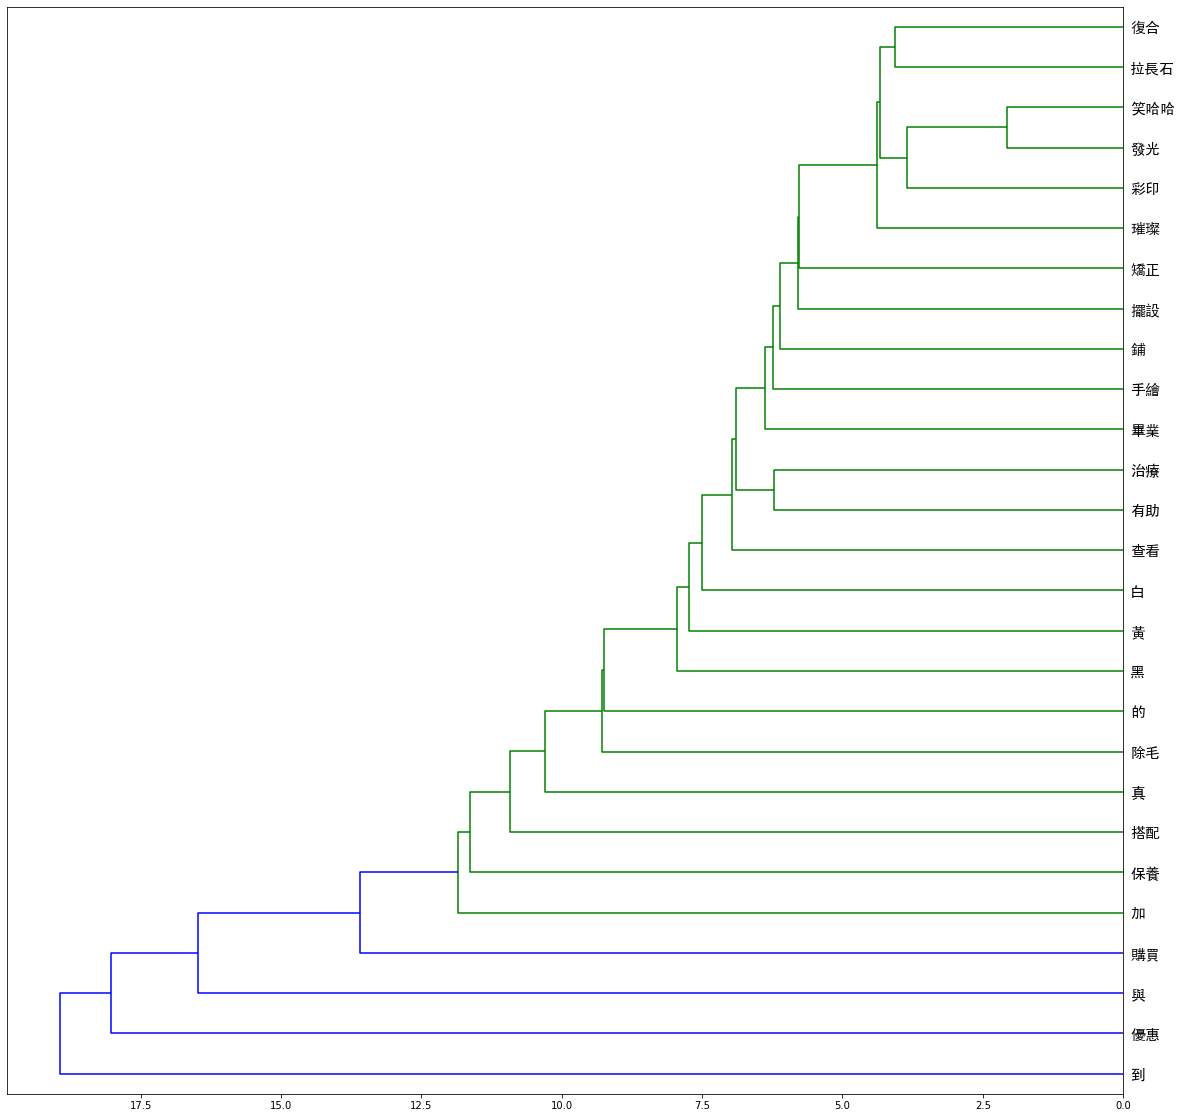

In [60]:
# -*- coding: utf-8 -*-
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm

linked = linkage(w2v_d, 'single')

labelList = list(d.values())

plt.figure(figsize=(20, 20))

dendrogram(linked, orientation = 'left', labels = labelList, distance_sort = 'descending', show_leaf_counts = True)

prop = fm.FontProperties(fname='/content/drive/MyDrive/NTU_Studies/2021_Fall/python-warmup-exercise-tanlianhui/SimHei.ttf')
plt.yticks(fontproperties = prop, fontsize=15)

plt.show()

# Bonus - Exercise 2 (+20%)

Âà©Áî®‰Ω†ÁöÑword2vec modelÔºåË´ãË®ìÁ∑¥‰∏ÄÂÄãÁ∞°ÊòìÁöÑÊñáÊú¨ÂàÜÈ°ûÂô®„ÄÇ

- document embeddingË´ãÁõ¥Êé•Âπ≥ÂùáÊñáÊú¨‰∏≠ÊâÄÊúâË©ûÂΩôÁöÑË©ûÂêëÈáè(e.g.„ÄåÁßãÂ§© Âø´ Âà∞ ‰∫Ü„ÄçÁõ¥Êé•Âπ≥Âùá4ÂÄãË©ûÁöÑË©ûÂêëÈáè)
- Âπ≥ÂùáË©ûÂêëÈáèÊôÇÔºå‰∏çÂú®word2vec vocabularyË£°ÁöÑË©ûÂΩôÊúÉÂºïÁôºOOV(out of vocabulary)ÁöÑÂïèÈ°å
- ÊúâÈúÄË¶ÅÁöÑË©±ÂèØ‰ª•Âà©Áî®`chinese_stopwords.txt`ÂéªÈô§ÂÅúÁî®Ë©û
- ÊñáÊú¨ÁöÑÈ°ûÂà•Âú®`ig5000.csv`ÁöÑ'label'Ê¨Ñ‰Ωç‰∏≠(0=Êó•Â∏∏;1=Âª£Âëä)
- Ë®ìÁ∑¥ÊñπÈù¢Ôºå‰Ω†ÂèØ‰ª•Èö®ÊÑèË∑ë‰∏Ä‰∫õ‰Ω†ÂñúÊ≠°ÁöÑmachine learning models (logistic regression, SVM, random forest,... deep learningÈô§Â§ñ)
- cross validationÂíåhyperparameters tuningÊúâÁ©∫ÂÜçÂÅöÂ∞±Â•Ω

ÊúÄÂæå‰Ω†ÁöÑoutputËá≥Â∞ëÈúÄË¶ÅÂåÖÂê´:
1. ÊñáÊú¨ÁöÑdocument-embeddings matrix (Â¶Ç‰∏ãÈù¢corpus) (10%)
2. Á∞°Ëø∞‰Ω†Â¶Ç‰ΩïËß£Ê±∫Ë®àÁÆódocument embeddingÊôÇÁöÑOOVÂïèÈ°å (5%)
3. ‰Ω†ÊâÄË©¶ÈÅéÁöÑÊâÄÊúâmodelÂíå‰ªñÂÄëÁöÑtest set accuracy (2.5%)
4. Ë°®ÁèæÊúÄÂ•ΩÁöÑmodelÁöÑconfusion matrix (2.5%)


In [ ]:
corpus

In [ ]:
print("Naive Bayes:", gnb.score(X_test, y_test))
print("Logistic Regression:",lgr.score(X_test, y_test))
print("Random Forest:", rfc.score(X_test, y_test))

## Ë°®ÁèæÊúÄÂ•ΩÁöÑmodel

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(conf, xticklabels=labels, yticklabels=labels,annot=True, vmin=0, vmax=1, cmap="YlGnBu")